In [1]:
sc

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from csv import reader

In [3]:
crime = sc.textFile('./data/NYPD_Complaint_Data_Historic.csv', 1)
crime = crime.mapPartitions(lambda x: reader(x))
header = crime.first()

In [4]:
lines = crime.filter(lambda line: line != header) \
                   .map(lambda x: (x[1][6:]+"/"+x[1][:2],(1,0,0,0)) if x[11]=='FELONY' else (x[1][6:]+"/"+x[1][:2],(0,1,0,0)) if x[11]=='MISDEMEANOR' else (x[1][6:]+"/"+x[1][:2],(0,0,1,0)) if x[11]=='VIOLATION' else (x[1][6:]+"/"+x[1][:2],(0,0,0,1)) ) \
           .reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1], x[2]+y[2], x[3]+y[3])).filter(lambda x:'2006'<=x[0][:4]<='2016')

lines = lines.map(lambda x: "%s\t%d\t%d\t%d\t%d" %(x[0],x[1][0],x[1][1],x[1][2],x[1][3])).collect()
lines = [line.split('\t') for line in lines]

In [5]:
import datetime
from datetime import datetime
df=pd.DataFrame(lines)

df.columns=['DATE','FELONY','MISDEMEANOR','VIOLATION','OTHER']
#df=df.sort_values(by='DATE',ascending=True)
df['DATE']=pd.to_datetime(df['DATE'])
df=df.sort_values(by='DATE',ascending=True)
df

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER
102,2006-01-01,14971,24450,5875,0
75,2006-02-01,11959,21283,4988,0
91,2006-03-01,14202,25096,5919,0
89,2006-04-01,13418,24492,5636,0
114,2006-05-01,14946,25564,6314,0
47,2006-06-01,14601,25415,6198,0
49,2006-07-01,15255,25771,6252,0
13,2006-08-01,15652,25748,5895,0
44,2006-09-01,15128,24515,6020,0
93,2006-10-01,15623,25297,5950,0


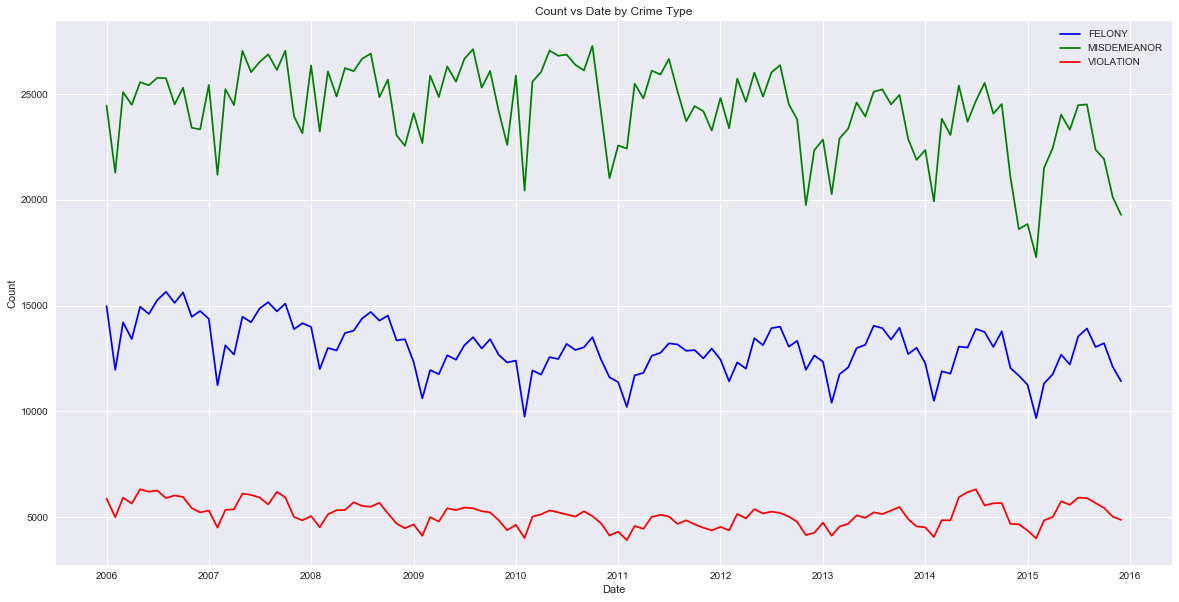

In [6]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['FELONY'], 'b-',label="FELONY")
plt.plot_date(df['DATE'], df['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.plot_date(df['DATE'], df['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

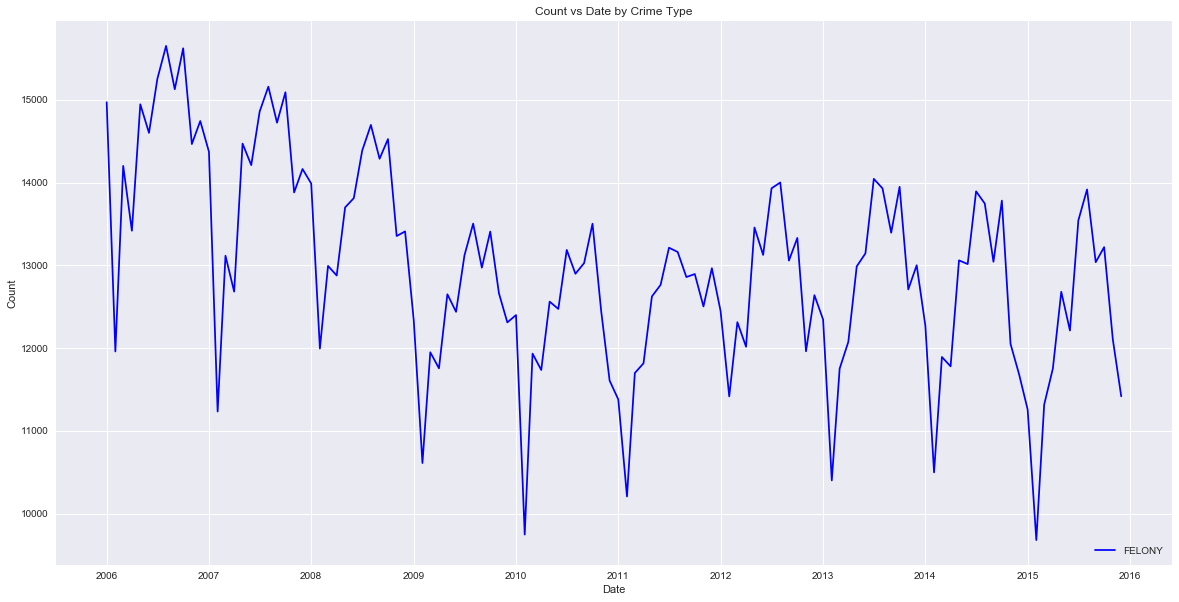

In [7]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['FELONY'], 'b-',label="FELONY")
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

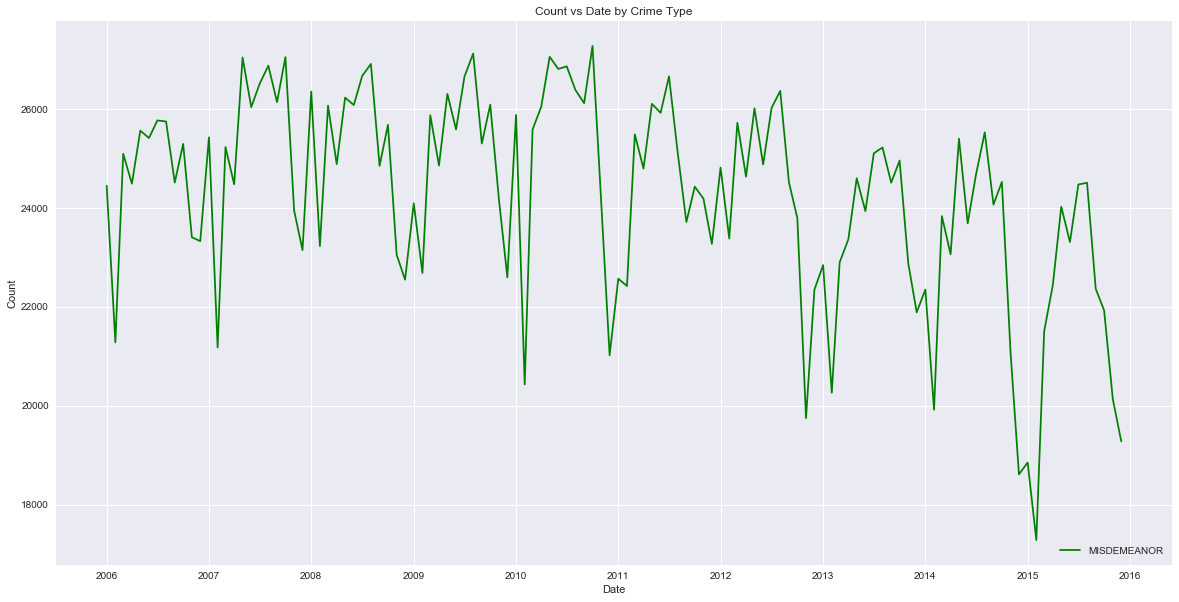

In [8]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import datetime

plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

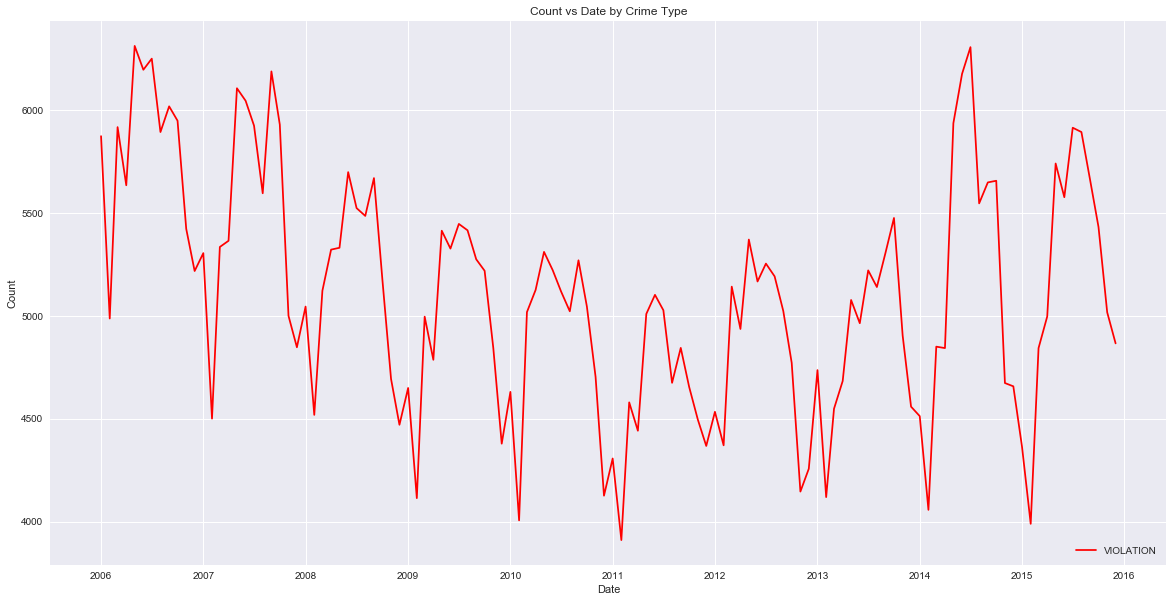

In [9]:
plt.figure(figsize=(20,10))
plt.plot_date(df['DATE'], df['VIOLATION'], 'r-',label="VIOLATION")
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

### By Month (Normalized)

In [278]:
lines_month = crime.filter(lambda line: line != header) \
            .filter(lambda x:'2006'<=x[1][6:]<='2016')\
            .map(lambda x: (x[1][:2],(1,0,0,0)) if x[11]=='FELONY' else (x[1][:2],(0,1,0,0)) if x[11]=='MISDEMEANOR' else (x[1][:2],(0,0,1,0)) if x[11]=='VIOLATION' else (x[1][:2],(0,0,0,1)) ) \
            .reduceByKey(lambda x,y: ((x[0]+y[0], x[1]+y[1], x[2]+y[2], x[3]+y[3])))

lines_month = lines_month.map(lambda x: "%s\t%d\t%d\t%d\t%d" %(x[0],x[1][0],x[1][1],x[1][2],x[1][3])).collect()
print(lines_month)
lines_month = [line.split('\t') for line in lines_month]



['05\t133136\t258350\t55621\t0', '01\t127767\t237652\t47963\t0', '12\t127946\t218063\t45752\t0', '09\t135529\t246116\t54918\t0', '11\t128135\t226741\t47906\t0', '08\t140666\t259799\t53871\t0', '06\t131796\t251675\t55488\t0', '07\t139434\t259425\t55999\t0', '03\t123163\t247313\t50361\t0', '04\t121905\t243069\t50144\t0', '10\t139329\t251040\t53321\t0', '02\t107740\t212087\t42574\t0']


In [295]:
import datetime
from datetime import datetime
df_month=pd.DataFrame(lines_month)

df_month.columns=['Month','FELONY','MISDEMEANOR','VIOLATION','OTHER']
#df=df.sort_values(by='DATE',ascending=True)
#df['DATE']=pd.to_datetime(df['MONTH'])
df_month=df_month.sort_values(by='Month',ascending=True)
#df_month['Month']=pd.to_numeric(df_month['Month'])
df_month

,Month,FELONY,MISDEMEANOR,VIOLATION,OTHER
1,01,127767,237652,47963,0
11,02,107740,212087,42574,0
8,03,123163,247313,50361,0
9,04,121905,243069,50144,0
0,05,133136,258350,55621,0
6,06,131796,251675,55488,0
7,07,139434,259425,55999,0
5,08,140666,259799,53871,0
3,09,135529,246116,54918,0
10,10,139329,251040,53321,0


In [297]:
dates=[31,28,31,30,31,30,31,31,30,31,30,31]
for i in range (12):
    df_month.iloc[i][1:]=pd.to_numeric(df_month.iloc[i][1:])/dates[i]*30
df_month['Month']=pd.to_numeric(df_month['Month'])
df_month

,Month,FELONY,MISDEMEANOR,VIOLATION,OTHER
1,1,119657,222567,44918.5,0
11,2,123681,243467,48873.2,0
8,3,115345,231615,47164.3,0
9,4,121905,243069,50144,0
0,5,124685,241951,52090.4,0
6,6,131796,251675,55488,0
7,7,130583,242958,52444.4,0
5,8,131737,243308,50451.5,0
3,9,135529,246116,54918,0
10,10,130485,235105,49936.4,0


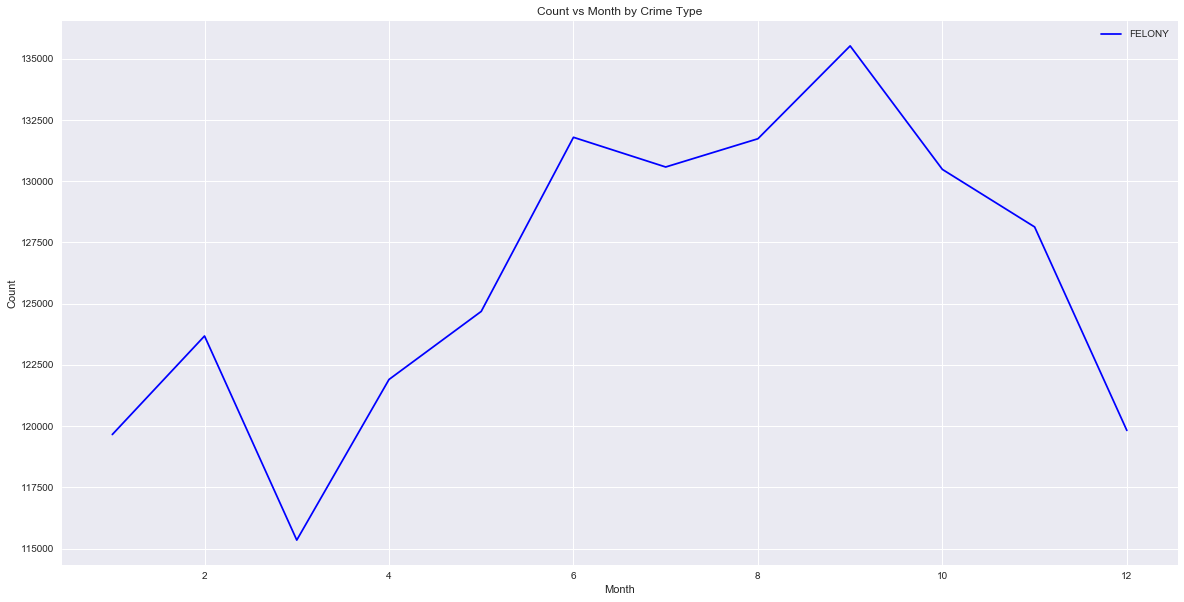

In [298]:
plt.figure(figsize=(20,10))
plt.plot(df_month['Month'], df_month['FELONY'], 'b-',label="FELONY")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

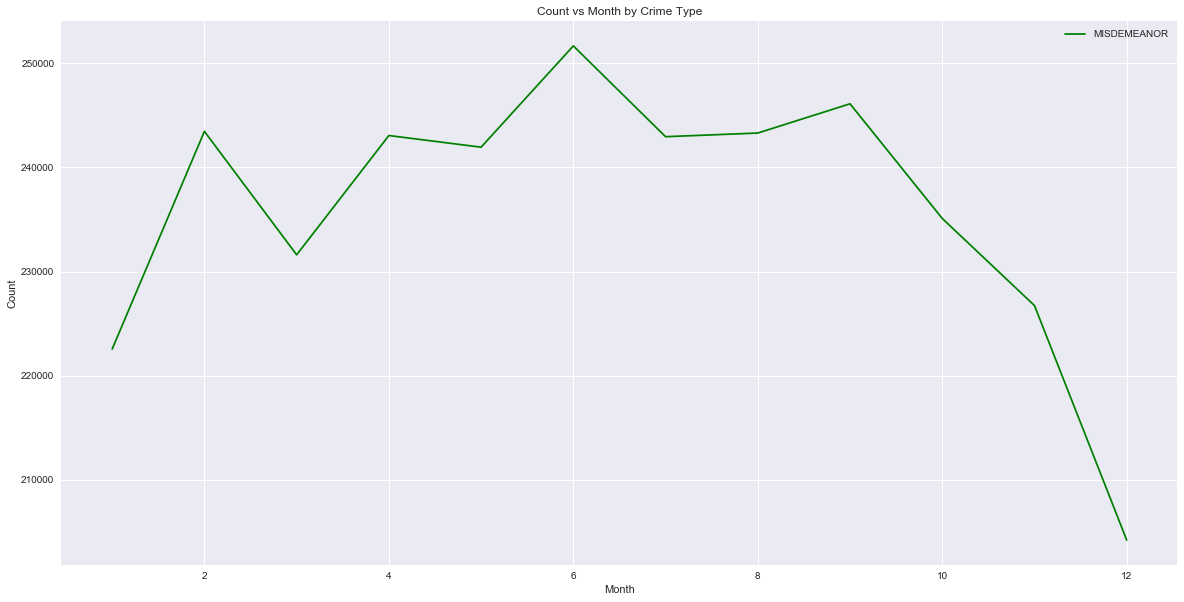

In [299]:
plt.figure(figsize=(20,10))
plt.plot(df_month['Month'], df_month['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

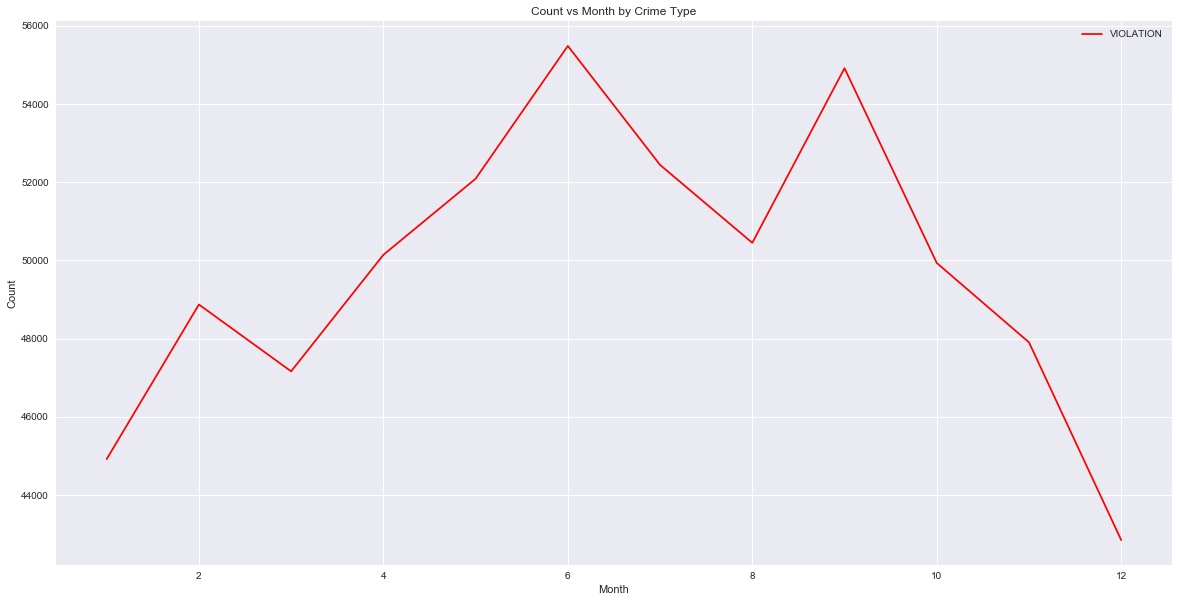

In [300]:
plt.figure(figsize=(20,10))
plt.plot(df_month['Month'], df_month['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

In [311]:
from scipy.stats import pearsonr
print('FELONY vs Month')
print("Pearson correlation coeffcient: "+str(pearsonr(df_month['FELONY'],df_month['Month'])[0])+", P-value: "+str(pearsonr(df_month['FELONY'],df_month['Month'])[1]))
print('MISDEMEANOR vs Month')
print("Pearson correlation coeffcient: "+str(pearsonr(df_month['MISDEMEANOR'],df_month['Month'])[0])+", P-value: "+str(pearsonr(df_month['MISDEMEANOR'],df_month['Month'])[1]))
print('VIOLATION vs Month')
print("Pearson correlation coeffcient: "+str(pearsonr(df_month['VIOLATION'],df_month['Month'])[0])+", P-value: "+str(pearsonr(df_month['VIOLATION'],df_month['Month'])[1]))



FELONY vs Month
Pearson correlation coeffcient: 0.482233838076, P-value: 0.112351264371
MISDEMEANOR vs Month
Pearson correlation coeffcient: -0.305423177077, P-value: 0.334352096486
VIOLATION vs Month
Pearson correlation coeffcient: 0.0128752780417, P-value: 0.968321747803


In [385]:
df_corr=pd.DataFrame()
df_corr['Type']=['FELONY vs Month','MISDEMEANOR vs Month','VIOLATION vs Month']
df_corr['P-Value']=[pearsonr(df_month['FELONY'],df_month['Month'])[1],pearsonr(df_month['MISDEMEANOR'],df_month['Month'])[1],pearsonr(df_month['VIOLATION'],df_month['Month'])[1]]
df_corr['Pearson Corr Coeff']=[pearsonr(df_month['FELONY'],df_month['Month'])[0],pearsonr(df_month['MISDEMEANOR'],df_month['Month'])[0],pearsonr(df_month['VIOLATION'],df_month['Month'])[0]]

In [383]:
df_corr

,Type,P-Value,Pearson Corr Coeff
0,FELONY vs Month,0.112351,0.482234
1,MISDEMEANOR vs Month,0.334352,-0.305423
2,VIOLATION vs Month,0.968322,0.012875


In [307]:
df_month['Season']=[0,0,1,1,1,2,2,2,3,3,3,0]
df_season=df_month.groupby(['Season'])[['FELONY','MISDEMEANOR','VIOLATION']].sum()

In [312]:
from scipy.stats import pearsonr
print('FELONY vs Season')
print("Pearson correlation coeffcient: "+str(pearsonr(df_season['FELONY'],df_season.index)[0])+", P-value: "+str(pearsonr(df_season['FELONY'],df_season.index)[1]))
print('MISDEMEANOR vs Season')
print("Pearson correlation coeffcient: "+str(pearsonr(df_season['MISDEMEANOR'],df_season.index)[0])+", P-value: "+str(pearsonr(df_season['MISDEMEANOR'],df_season.index)[1]))
print('VIOLATION vs Season')
print("Pearson correlation coeffcient: "+str(pearsonr(df_season['VIOLATION'],df_season.index)[0])+", P-value: "+str(pearsonr(df_season['VIOLATION'],df_season.index)[1]))




FELONY vs Season
Pearson correlation coeffcient: 0.885633731493, P-value: 0.114366268507
MISDEMEANOR vs Season
Pearson correlation coeffcient: 0.614142556133, P-value: 0.385857443867
VIOLATION vs Season
Pearson correlation coeffcient: 0.803362130292, P-value: 0.196637869708


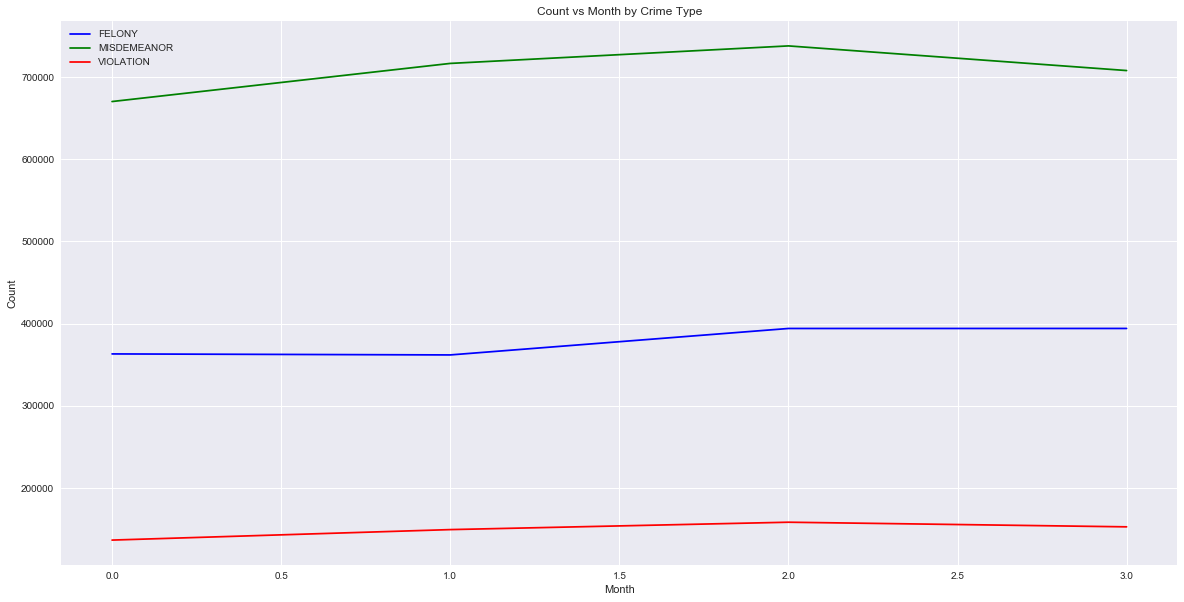

In [388]:
plt.figure(figsize=(20,10))
plt.plot(df_season.index, df_season['FELONY'], 'b-',label="FELONY")
plt.plot(df_season.index, df_season['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.plot(df_season.index, df_season['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Count vs Month by Crime Type")
plt.show()

In [313]:
lines_ym = crime.filter(lambda line: line != header) \
                   .map(lambda x: (x[1][6:]+"/"+x[1][:2],(1,0,0,0)) if x[11]=='FELONY' else (x[1][6:]+"/"+x[1][:2],(0,1,0,0)) if x[11]=='MISDEMEANOR' else (x[1][6:]+"/"+x[1][:2],(0,0,1,0)) if x[11]=='VIOLATION' else (x[1][6:]+"/"+x[1][:2],(0,0,0,1)) ) \
           .reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1], x[2]+y[2], x[3]+y[3])).filter(lambda x:'2006'<=x[0][:4]<='2016')

lines_ym = lines_ym.map(lambda x: "%s\t%d\t%d\t%d\t%d" %(x[0],x[1][0],x[1][1],x[1][2],x[1][3])).collect()
lines_ym = [line.split('\t') for line in lines_ym]

In [318]:
df_ym=pd.DataFrame(lines_ym)
df_ym.columns=['DATE','FELONY','MISDEMEANOR','VIOLATION','OTHER']
#df=df.sort_values(by='DATE',ascending=True)
df_ym['DATE']=pd.to_datetime(df_ym['DATE'])
df_ym['FELONY']=pd.to_numeric(df_ym['FELONY'])
df_ym['MISDEMEANOR']=pd.to_numeric(df_ym['MISDEMEANOR'])
df_ym['VIOLATION']=pd.to_numeric(df_ym['VIOLATION'])
df_ym['OTHER']=pd.to_numeric(df_ym['OTHER'])
df_ym=df_ym.sort_values(by='DATE',ascending=True)
df_ym

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER
102,2006-01-01,14971,24450,5875,0
75,2006-02-01,11959,21283,4988,0
91,2006-03-01,14202,25096,5919,0
89,2006-04-01,13418,24492,5636,0
114,2006-05-01,14946,25564,6314,0
47,2006-06-01,14601,25415,6198,0
49,2006-07-01,15255,25771,6252,0
13,2006-08-01,15652,25748,5895,0
44,2006-09-01,15128,24515,6020,0
93,2006-10-01,15623,25297,5950,0


In [350]:
def season(row):
    seasons=[0,0,1,1,1,2,2,2,3,3,3,0]
    return seasons[row['DATE'].month-1]
def year(row):
    return row['DATE'].year
df_ym['Season']=df_ym.apply(season,1)
df_ym['Year']=df_ym.apply(year,1)
df_ym_season=df_ym.groupby(['Season','Year'])['FELONY','MISDEMEANOR','VIOLATION'].sum()


In [365]:
def return_season(row):
    seasons=['Winter', 'Spring','Summer','Fall']
    return seasons[row['Season']]
df_ym_season['Season']=0
for i in range(df_ym_season.shape[0]):
    df_ym_season['Season'][i]=df_ym_season.index[i][0]
df_ym_season['Season_name']=df_ym_season.apply(return_season,1)
df_ym_season


FELONY  MISDEMEANOR  VIOLATION  Season Season_name
Season Year                                                    
0      2006   41674        69063      16082       0      Winter
       2007   39770        69757      14655       0      Winter
       2008   39393        72136      14036       0      Winter
       2009   35255        69379      13143       0      Winter
       2010   33752        67337      12763       0      Winter
       2011   34550        68267      12585       0      Winter
       2012   36504        70549      13162       0      Winter
       2013   35746        65000      13415       0      Winter
       2014   34455        60888      13228       0      Winter
       2015   32354        55426      13220       0      Winter
1      2006   42566        75152      17869       1      Spring
       2007   40269        76754      16810       1      Spring
       2008   39570        77188      15778       1      Spring
       2009   36354        77042      15199       1      Spring
       2010   36229        78690      15458       1      Spring
       2011   36138        76390      14032       1      Spring
       2012   37786        76371      15452       1      Spring
       2013   36813        70866      14311       1      Spring
       2014   36731        72300      15633       1      Spring
       2015   35748        67979      15584       1      Spring
2      2006   45508        76934      18345       2      Summer
       2007   44229        79428      17570       2      Summer
       2008   42896        79666      16712       2      Summer
       2009   39063        79370      16193       2      Summer
       2010   38557        80061      15365       2      Summer
       2011   39138        77705      14806       2      Summer
       2012   41058        77268      15616       2      Summer
       2013   41119        74266      15328       2      Summer
       2014   40656        73904      18034       2      Summer
       2015   39672        72297      17389       2      Summer
3      2006   45217        73220      17394       3        Fall
       2007   43697        77140      17122       3        Fall
       2008   42168        73588      15544       3        Fall
       2009   39042        75566      15340       3        Fall
       2010   38975        77517      15021       3        Fall
       2011   38256        72335      13996       3        Fall
       2012   38349        68071      13942       3        Fall
       2013   40052        72351      15691       3        Fall
       2014   38874        69678      15982       3        Fall
       2015   38363        64431      16113       3        Fall

In [367]:
from scipy.stats import pearsonr
print('FELONY vs Season')
print("Pearson correlation coeffcient: "+str(pearsonr(df_ym_season['FELONY'],df_ym_season['Season'])[0])+", P-value: "+str(pearsonr(df_ym_season['FELONY'],df_ym_season['Season'])[1]))
print('MISDEMEANOR vs Season')
print("Pearson correlation coeffcient: "+str(pearsonr(df_ym_season['MISDEMEANOR'],df_ym_season['Season'])[0])+", P-value: "+str(pearsonr(df_ym_season['MISDEMEANOR'],df_ym_season['Season'])[1]))
print('VIOLATION vs Season')
print("Pearson correlation coeffcient: "+str(pearsonr(df_ym_season['VIOLATION'],df_ym_season['Season'])[0])+", P-value: "+str(pearsonr(df_ym_season['VIOLATION'],df_ym_season['Season'])[1]))




FELONY vs Season
Pearson correlation coeffcient: 0.55221217502, P-value: 0.000220533182962
MISDEMEANOR vs Season
Pearson correlation coeffcient: 0.397954161799, P-value: 0.0109880062613
VIOLATION vs Season
Pearson correlation coeffcient: 0.507884712528, P-value: 0.000821401786662


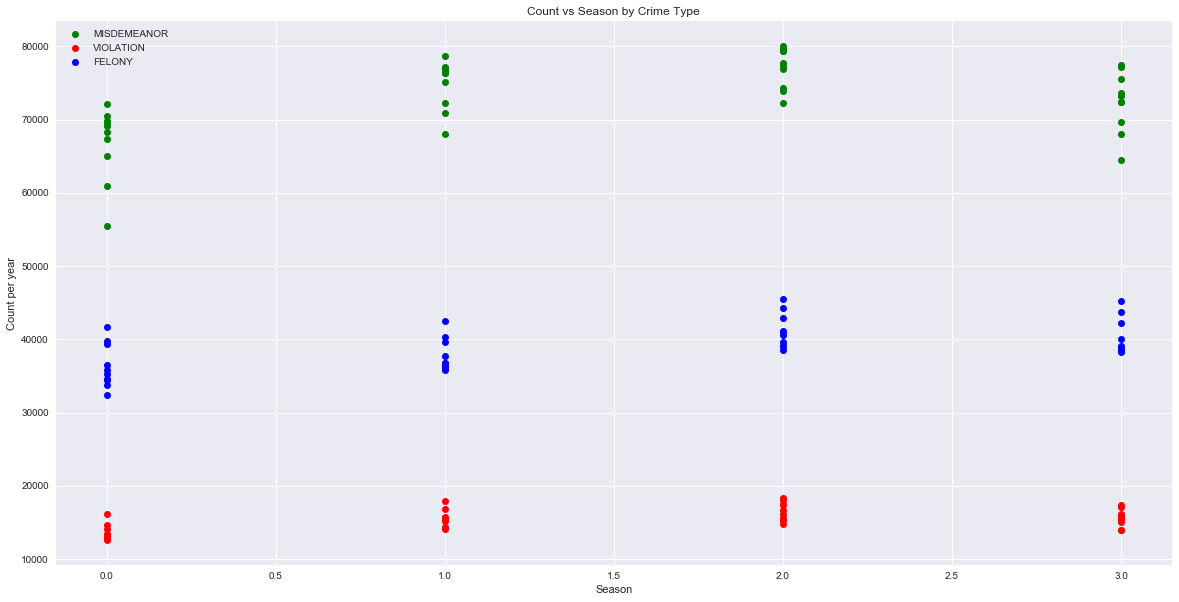

In [372]:
plt.figure(figsize=(20,10))
plt.plot(df_ym_season['Season'], df_ym_season['MISDEMEANOR'],'go',label="MISDEMEANOR")
plt.plot(df_ym_season['Season'], df_ym_season['VIOLATION'],'ro',label="VIOLATION")
plt.plot(df_ym_season['Season'], df_ym_season['FELONY'],'bo',label="FELONY")
plt.legend()
plt.xticks=['winter','Spring', 'Summer','Fall']
plt.xlabel("Season")
plt.ylabel("Count per year")
plt.title("Count vs Season by Crime Type")
plt.show()

### By weekday

In [36]:
lines = crime.filter(lambda line: line != header) \
                   .map(lambda x: (x[1],(1,0,0,0)) if x[11]=='FELONY' else (x[1],(0,1,0,0)) if x[11]=='MISDEMEANOR' else (x[1],(0,0,1,0)) if x[11]=='VIOLATION' else (x[1],(0,0,0,1)) ) \
           .reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1], x[2]+y[2], x[3]+y[3])).filter(lambda x:'2006'<=x[0][6:]<='2016')

lines = lines.map(lambda x: "%s\t%d\t%d\t%d\t%d" %(x[0],x[1][0],x[1][1],x[1][2],x[1][3])).collect()
lines = [line.split('\t') for line in lines]

In [53]:
import datetime
from datetime import datetime
df=pd.DataFrame(lines)

df.columns=['DATE','FELONY','MISDEMEANOR','VIOLATION','OTHER']
#df=df.sort_values(by='DATE',ascending=True)
df['DATE']=pd.to_datetime(df['DATE'])
df['FELONY']=pd.to_numeric(df['FELONY'])
df['MISDEMEANOR']=pd.to_numeric(df['MISDEMEANOR'])
df['VIOLATION']=pd.to_numeric(df['VIOLATION'])
df['OTHER']=pd.to_numeric(df['OTHER'])
df['weekday']=df['DATE'].apply(datetime.isoweekday)
df=df.sort_values(by='DATE',ascending=True)
df

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER,weekday
1841,2006-01-01,863,1062,231,0,7
1200,2006-01-02,400,633,179,0,1
3178,2006-01-03,474,724,187,0,2
3350,2006-01-04,494,862,175,0,3
342,2006-01-05,524,871,209,0,4
2683,2006-01-06,580,869,210,0,5
490,2006-01-07,395,767,188,0,6
716,2006-01-08,417,730,190,0,7
3122,2006-01-09,534,720,176,0,1
667,2006-01-10,498,881,203,0,2


In [78]:
weekday=df.groupby('weekday').sum()
weekday['COUNT']=df.groupby('weekday').count()['DATE']
weekday['FELONY_AVG']=weekday['FELONY']/weekday['COUNT']
weekday['MISDEMEANOR_AVG']=weekday['MISDEMEANOR']/weekday['COUNT']
weekday['VIOLATION_AVG']=weekday['VIOLATION']/weekday['COUNT']
weekday['OTHER_AVG']=weekday['OTHER']/weekday['COUNT']

In [79]:
weekday['FELONY_NORMALIZED']=(weekday['FELONY'])/weekday['FELONY'].max()
weekday['MISDEMEANOR_NORMALIZED']=(weekday['MISDEMEANOR'])/weekday['MISDEMEANOR'].max()
weekday['VIOLATION_NORMALIZED']=(weekday['VIOLATION'])/weekday['VIOLATION'].max()

In [80]:
weekday

,FELONY,MISDEMEANOR,VIOLATION,OTHER,COUNT,FELONY_AVG,MISDEMEANOR_AVG,VIOLATION_AVG,OTHER_AVG,FELONY_NORMALIZED,MISDEMEANOR_NORMALIZED,VIOLATION_NORMALIZED
weekday,,,,,,,,,,,,
1,212458,378801,89586,0,522,407.007663,725.672414,171.620690,0.0,0.856938,0.839166,0.987685
2,223860,416894,89688,0,522,428.850575,798.647510,171.816092,0.0,0.902927,0.923554,0.988810
3,229969,429785,90223,0,522,440.553640,823.342912,172.840996,0.0,0.927567,0.952111,0.994708
4,228195,423601,88992,0,522,437.155172,811.496169,170.482759,0.0,0.920412,0.938412,0.981136
5,247927,451402,90703,0,521,475.867562,866.414587,174.094050,0.0,1.000000,1.000000,1.000000
6,220897,431368,82324,0,521,423.986564,827.961612,158.011516,0.0,0.890976,0.955618,0.907622
7,193240,379479,82402,0,522,370.191571,726.971264,157.858238,0.0,0.779423,0.840668,0.908482


### Total Crime Count by Weekday

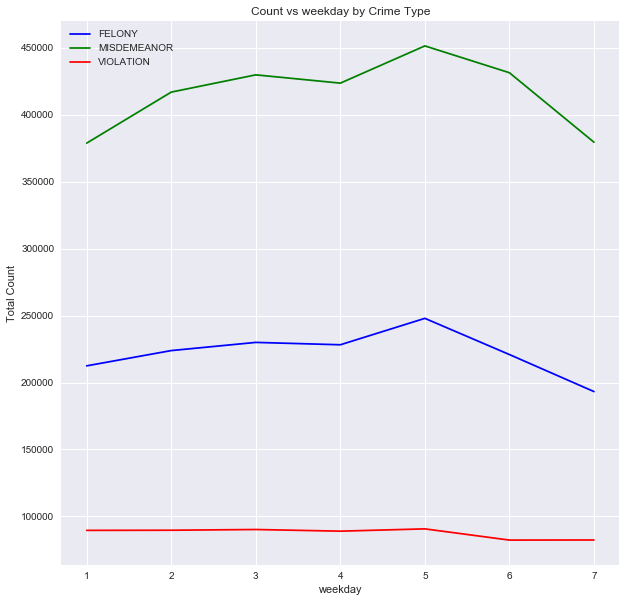

In [62]:
plt.figure(figsize=(10,10))
plt.plot(weekday.index, weekday['FELONY'], 'b-',label="FELONY")
plt.plot(weekday.index, weekday['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.plot(weekday.index, weekday['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("weekday")
plt.ylabel("Total Count")
plt.title("Count vs weekday by Crime Type")
plt.show()

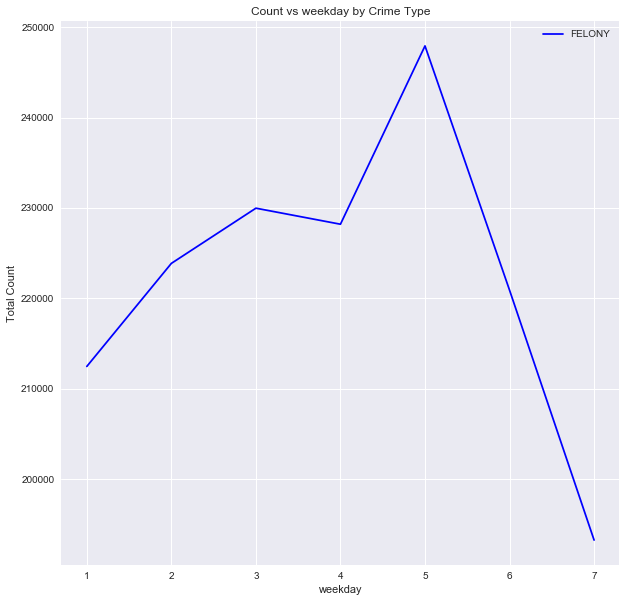

In [81]:
plt.figure(figsize=(10,10))
plt.plot(weekday.index, weekday['FELONY'], 'b-',label="FELONY")
plt.legend()
plt.xlabel("weekday")
plt.ylabel("Total Count")
plt.title("Count vs weekday by Crime Type")
plt.show()

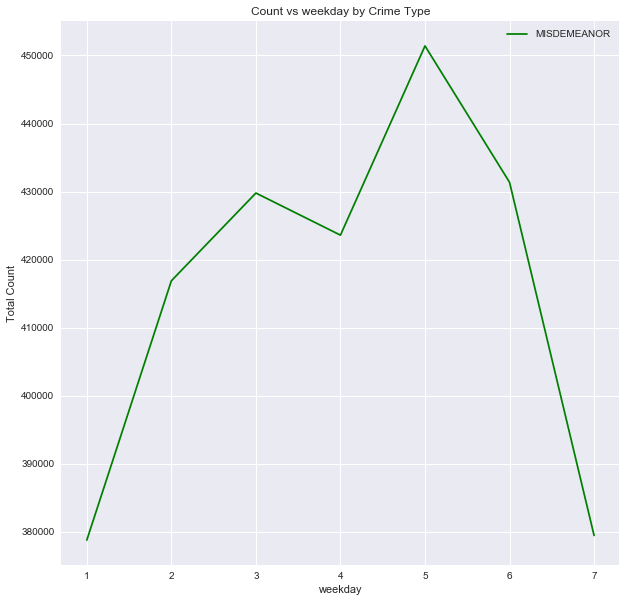

In [82]:
plt.figure(figsize=(10,10))
plt.plot(weekday.index, weekday['MISDEMEANOR'], 'g-',label="MISDEMEANOR")
plt.legend()
plt.xlabel("weekday")
plt.ylabel("Total Count")
plt.title("Count vs weekday by Crime Type")
plt.show()

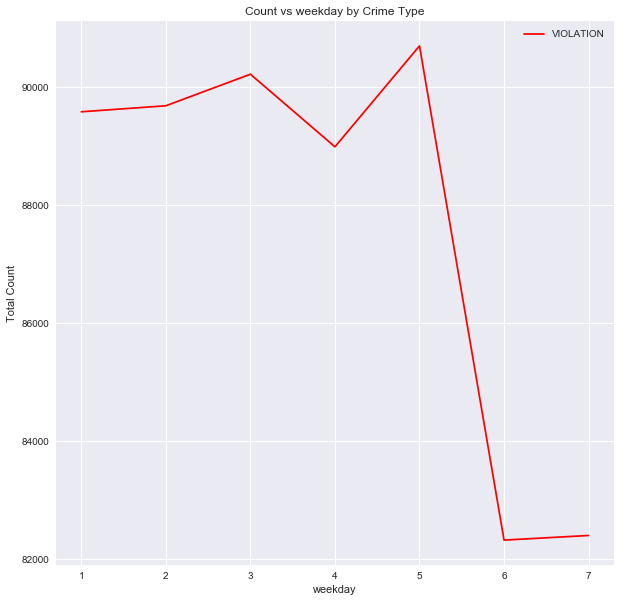

In [83]:
plt.figure(figsize=(10,10))
plt.plot(weekday.index, weekday['VIOLATION'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("weekday")
plt.ylabel("Total Count")
plt.title("Count vs weekday by Crime Type")
plt.show()

### Average Count by Weekday

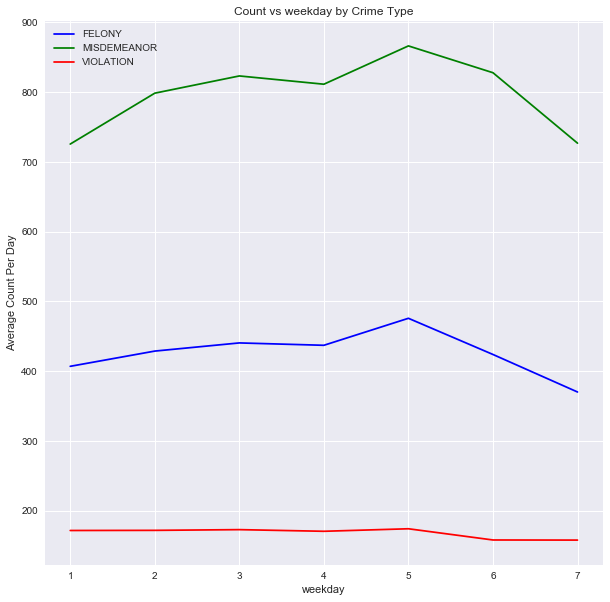

In [86]:
plt.figure(figsize=(10,10))
plt.plot(weekday.index, weekday['FELONY_AVG'], 'b-',label="FELONY")
plt.plot(weekday.index, weekday['MISDEMEANOR_AVG'], 'g-',label="MISDEMEANOR")
plt.plot(weekday.index, weekday['VIOLATION_AVG'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("weekday")
plt.ylabel("Average Count Per Day")
plt.title("Count vs weekday by Crime Type")
plt.show()

### Normalized Count by Weekday

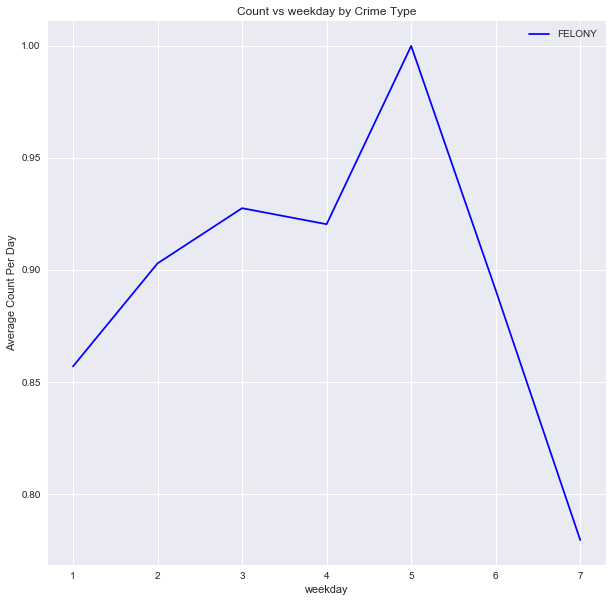

In [89]:
plt.figure(figsize=(10,10))
plt.plot(weekday.index, weekday['FELONY_NORMALIZED'], 'b-',label="FELONY")
plt.legend()
plt.xlabel("weekday")
plt.ylabel("Average Count Per Day")
plt.title("Count vs weekday by Crime Type")
plt.show()

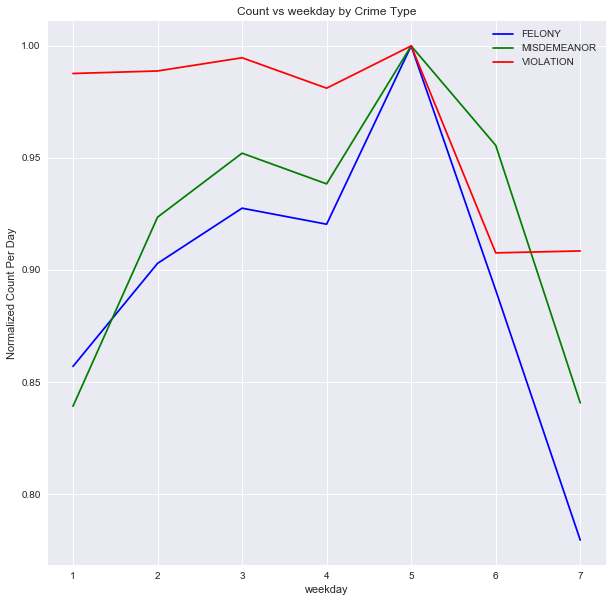

In [91]:
plt.figure(figsize=(10,10))
plt.plot(weekday.index, weekday['FELONY_NORMALIZED'], 'b-',label="FELONY")
plt.plot(weekday.index, weekday['MISDEMEANOR_NORMALIZED'], 'g-',label="MISDEMEANOR")
plt.plot(weekday.index, weekday['VIOLATION_NORMALIZED'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("weekday")
plt.ylabel("Normalized Count Per Day")
plt.title("Count vs weekday by Crime Type")
plt.show()

### Analysis 
Based on the above graph, all three types of crimme peak on Friday. There are significant reduction in crime repored on weekends, especially on Sunday. It could be as a result that people go to church on Sunday.

## NYC Jobs
 - Not Used 

In [95]:
job = sc.textFile('./data/NYC_Jobs.csv', 1)
job = job.mapPartitions(lambda x: reader(x))
header_job = job.first()

In [101]:
job

PythonRDD[39] at RDD at PythonRDD.scala:48

In [121]:
lines_job = job.filter(lambda line: line != header_job) \
                   .map(lambda x: (x[22][6:10]+"/"+x[22][:2],1)) \
           .reduceByKey(lambda x,y: x+y)

lines_job = lines_job.map(lambda x: "%s\t%s" %(x[0],x[1])).collect()
lines_job = [line.split('\t') for line in lines_job]


In [393]:
job_df=pd.DataFrame(lines_job)


In [173]:
job_df=pd.DataFrame(lines_job)
job_df.columns=['DATE','POST_COUNT']
#df=df.sort_values(by='DATE',ascending=True)
job_df['DATE']=pd.to_datetime(job_df['DATE'])
job_df=job_df.sort_values(by='DATE',ascending=True)


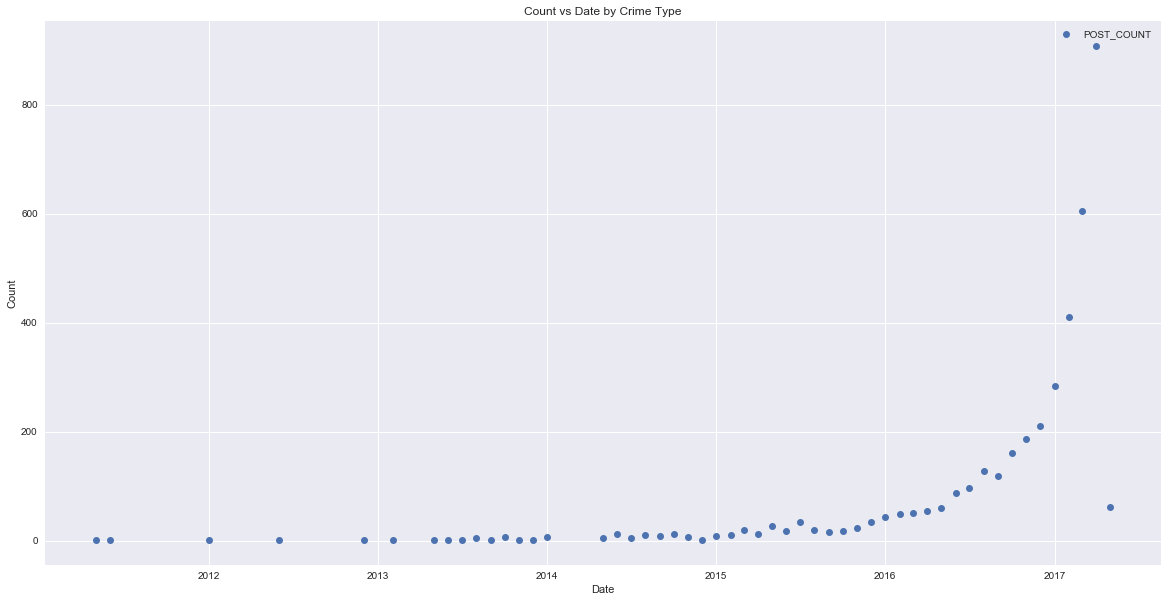

In [174]:
plt.figure(figsize=(20,10))
plt.plot_date(job_df['DATE'], job_df['POST_COUNT'])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Count vs Date by Crime Type")
plt.show()

## New York City Unemployment Data - smoothed with seasonality

In [229]:
unemp=pd.read_csv('./data/nyc_unemployment.csv')
unemp=unemp[unemp['YEAR']>=2006]
unemp=unemp[unemp['YEAR']<2016]

In [230]:
unemp['DATE']=[pd.to_datetime(str(a)+"1"+str(b), format='%m%d%Y') for a,b in zip(unemp['MONTH'], unemp['YEAR'])]
unemp['Unemployment Rate_Normalized']=(unemp['Unemployment Rate'])/unemp['Unemployment Rate'].max()
unemp['LF_Normalized']=(unemp['Labor Force'])/unemp['Labor Force'].max()
unemp['Employed_Normalized']=(unemp['Employed'])/unemp['Employed'].max()


In [231]:
unemp

,YEAR,MONTH,Labor Force,Employed,Unemployed,Unemployment Rate,DATE,Unemployment Rate_Normalized,LF_Normalized,Employed_Normalized
360,2006,1,3812376,3602263,210113,5.5,2006-01-01,0.539216,0.926664,0.924883
361,2006,2,3811143,3606061,205082,5.4,2006-02-01,0.529412,0.926364,0.925858
362,2006,3,3812017,3610186,201831,5.3,2006-03-01,0.519608,0.926577,0.926917
363,2006,4,3813787,3613784,200003,5.2,2006-04-01,0.509804,0.927007,0.927841
364,2006,5,3814501,3616734,197767,5.2,2006-05-01,0.509804,0.927180,0.928598
365,2006,6,3813386,3619301,194085,5.1,2006-06-01,0.500000,0.926909,0.929258
366,2006,7,3810862,3622247,188615,4.9,2006-07-01,0.480392,0.926296,0.930014
367,2006,8,3809015,3626048,182967,4.8,2006-08-01,0.470588,0.925847,0.930990
368,2006,9,3809732,3630920,178812,4.7,2006-09-01,0.460784,0.926021,0.932241
369,2006,10,3813349,3636860,176489,4.6,2006-10-01,0.450980,0.926900,0.933766


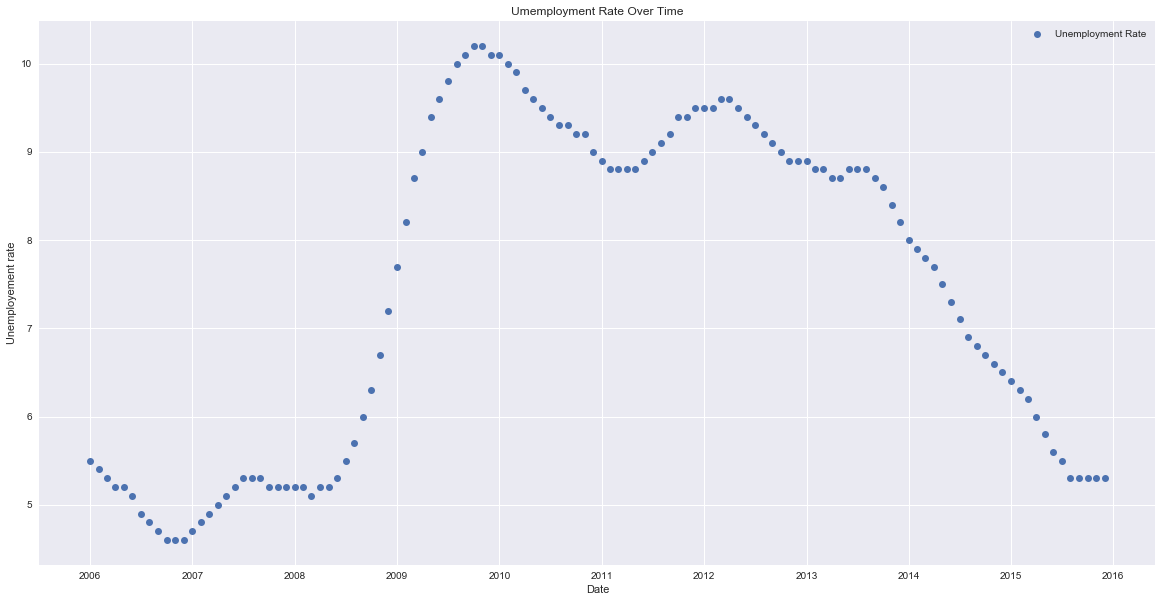

In [389]:
plt.figure(figsize=(20,10))
plt.plot_date(unemp['DATE'], unemp['Unemployment Rate'])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Unemployement rate")
plt.title("Umemployment Rate Over Time")
plt.show()

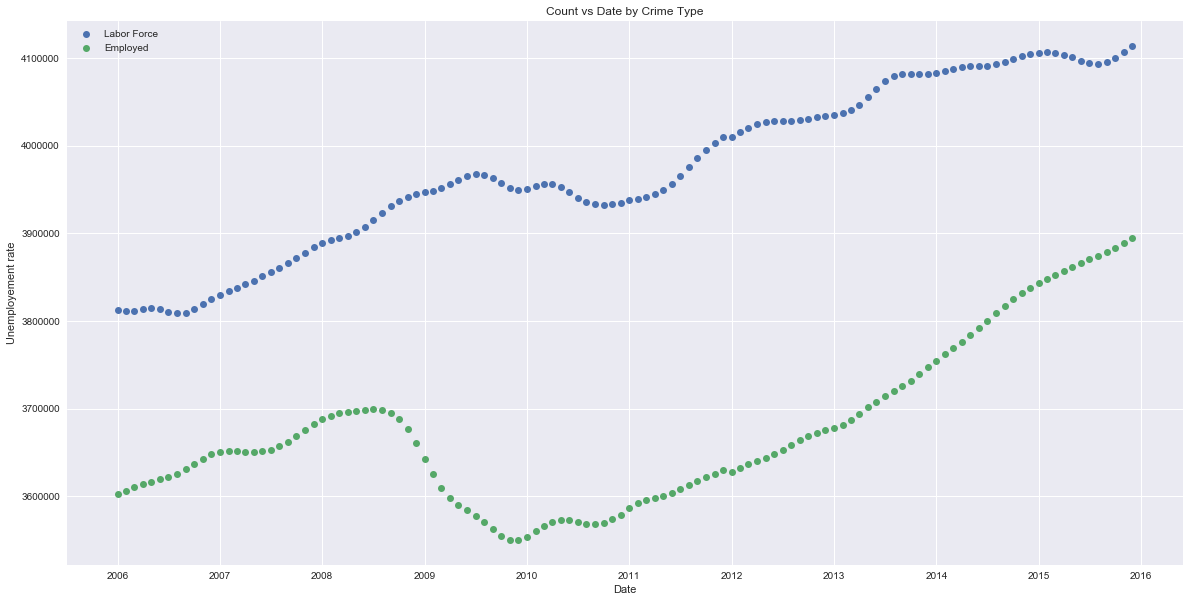

In [204]:
plt.figure(figsize=(20,10))
plt.plot_date(unemp['DATE'], unemp['Labor Force'])
plt.plot_date(unemp['DATE'], unemp['Employed'])
#plt.plot_date(unemp['DATE'], unemp['Unemployed'])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Unemployement rate")
plt.title("Count vs Date by Crime Type")
plt.show()

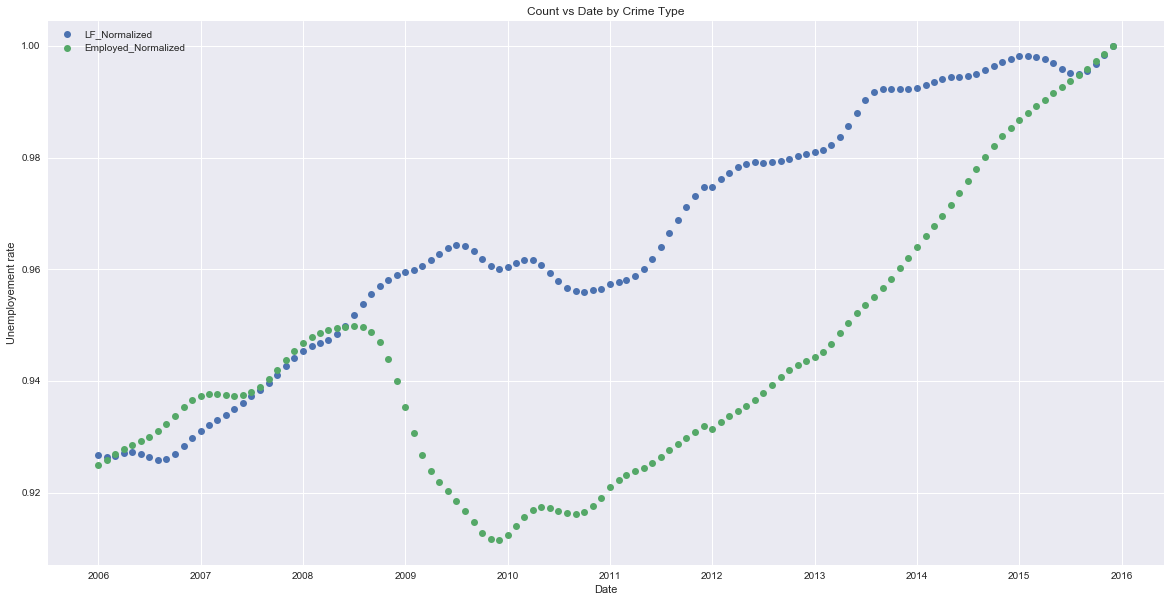

In [207]:
plt.figure(figsize=(20,10))
plt.plot_date(unemp['DATE'], unemp['LF_Normalized'])
plt.plot_date(unemp['DATE'], unemp['Employed_Normalized'])
#plt.plot_date(unemp['DATE'], unemp['Unemployment Rate_Normalized'])
plt.legend()
plt.xlabel("Date")
plt.ylabel("Unemployement rate")
plt.title("Count vs Date by Crime Type")
plt.show()

In [166]:
lines = crime.filter(lambda line: line != header) \
                   .map(lambda x: (x[1][6:]+"/"+x[1][:2],(1,0,0,0)) if x[11]=='FELONY' else (x[1][6:]+"/"+x[1][:2],(0,1,0,0)) if x[11]=='MISDEMEANOR' else (x[1][6:]+"/"+x[1][:2],(0,0,1,0)) if x[11]=='VIOLATION' else (x[1][6:]+"/"+x[1][:2],(0,0,0,1)) ) \
           .reduceByKey(lambda x,y: (x[0]+y[0], x[1]+y[1], x[2]+y[2], x[3]+y[3])).filter(lambda x:'2006'<=x[0][:4]<='2016')

lines = lines.map(lambda x: "%s\t%d\t%d\t%d\t%d" %(x[0],x[1][0],x[1][1],x[1][2],x[1][3])).collect()
lines = [line.split('\t') for line in lines]

In [175]:
import datetime
from datetime import datetime
df=pd.DataFrame(lines)

df.columns=['DATE','FELONY','MISDEMEANOR','VIOLATION','OTHER']
#df=df.sort_values(by='DATE',ascending=True)
df['DATE']=pd.to_datetime(df['DATE'])
df['FELONY']=pd.to_numeric(df['FELONY'])
df['MISDEMEANOR']=pd.to_numeric(df['MISDEMEANOR'])
df['VIOLATION']=pd.to_numeric(df['VIOLATION'])
df['OTHER']=pd.to_numeric(df['OTHER'])
df=df.sort_values(by='DATE',ascending=True)
df['FELONY_NORMALIZED']=(df['FELONY'])/df['FELONY'].max()
df['MISDEMEANOR_NORMALIZED']=(df['MISDEMEANOR'])/df['MISDEMEANOR'].max()
df['VIOLATION_NORMALIZED']=(df['VIOLATION'])/df['VIOLATION'].max()

In [177]:
df.head()

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER,FELONY_NORMALIZED,MISDEMEANOR_NORMALIZED,VIOLATION_NORMALIZED
102,2006-01-01,14971,24450,5875,0,0.956491,0.896360,0.930472
75,2006-02-01,11959,21283,4988,0,0.764056,0.780254,0.789990
91,2006-03-01,14202,25096,5919,0,0.907360,0.920043,0.937441
89,2006-04-01,13418,24492,5636,0,0.857271,0.897899,0.892620
114,2006-05-01,14946,25564,6314,0,0.954894,0.937200,1.000000


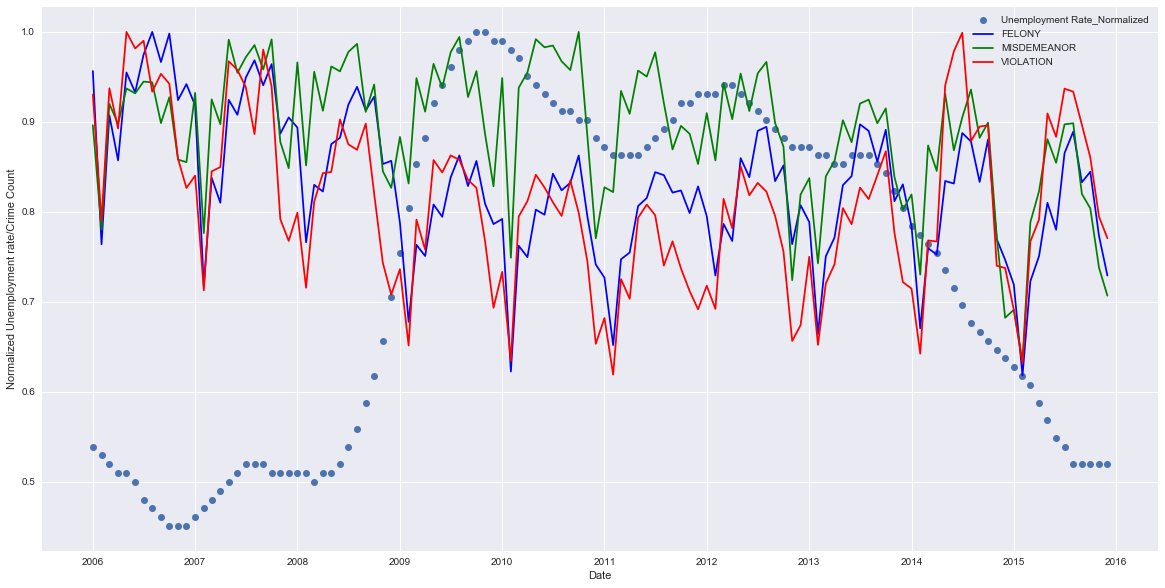

In [390]:
plt.figure(figsize=(20,10))
plt.plot_date(unemp['DATE'], unemp['Unemployment Rate_Normalized'])
plt.plot_date(df['DATE'], df['FELONY_NORMALIZED'], 'b-',label="FELONY")
plt.plot_date(df['DATE'], df['MISDEMEANOR_NORMALIZED'], 'g-',label="MISDEMEANOR")
plt.plot_date(df['DATE'], df['VIOLATION_NORMALIZED'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Normalized Unemployment rate/Crime Count")
#plt.title("Count vs Date by Crime Type")
plt.show()

In [196]:
from scipy.stats import pearsonr
print('FELONY vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df['FELONY'],unemp['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df['FELONY'],unemp['Unemployment Rate'])[1]))
print('MISDEMEANOR vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df['MISDEMEANOR'],unemp['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df['MISDEMEANOR'],unemp['Unemployment Rate'])[1]))
print('VIOLATION vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df['VIOLATION'],unemp['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df['VIOLATION'],unemp['Unemployment Rate'])[1]))


FELONY vs Unemployment Rate
Pearson correlation coeffcient: -0.441483715836, P-value: 4.4791590387e-07
MISDEMEANOR vs Unemployment Rate
Pearson correlation coeffcient: 0.0908521846798, P-value: 0.323710559068
VIOLATION vs Unemployment Rate
Pearson correlation coeffcient: -0.494235590501, P-value: 9.64393540973e-09


### Analysis
The pearson correlation coefficients of the three types of crime with employment rate show that Felony and violation have weak negative correlations with unemployment rate with high confidence. On the other hand, we cannot say that there is a correlation between misdemeanor crime with unemployment rate.  


## Relationship with Labor Force

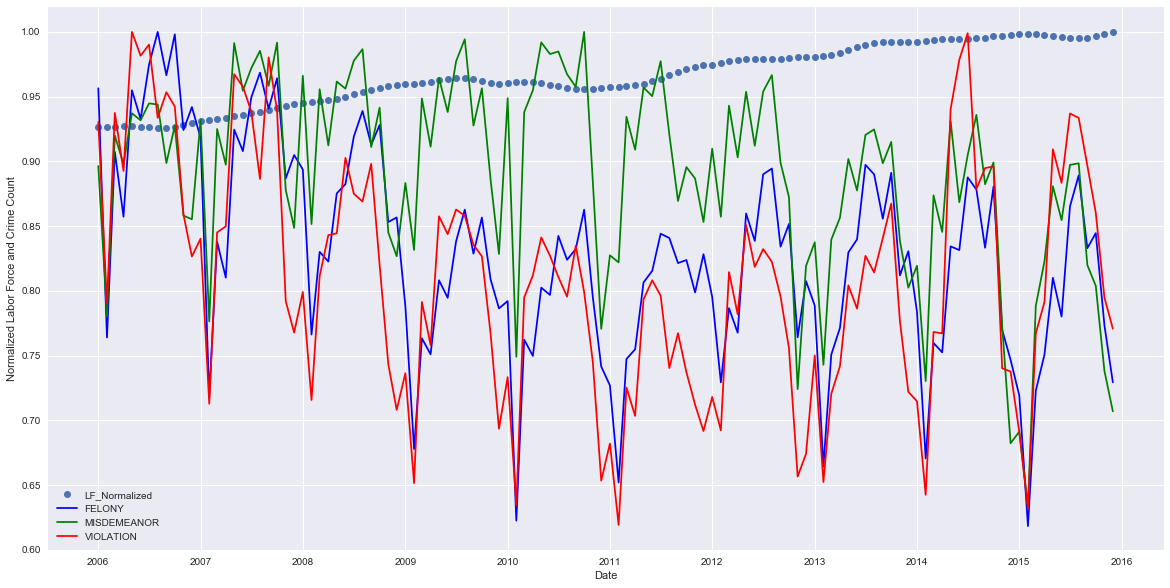

In [391]:
plt.figure(figsize=(20,10))
plt.plot_date(unemp['DATE'], unemp['LF_Normalized'])
plt.plot_date(df['DATE'], df['FELONY_NORMALIZED'], 'b-',label="FELONY")
plt.plot_date(df['DATE'], df['MISDEMEANOR_NORMALIZED'], 'g-',label="MISDEMEANOR")
plt.plot_date(df['DATE'], df['VIOLATION_NORMALIZED'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Normalized Labor Force and Crime Count")
#plt.title("Count vs Date by Crime Type")
plt.show()

In [209]:
from scipy.stats import pearsonr
print('FELONY vs Size of Labor Force')
print("Pearson correlation coeffcient: "+str(pearsonr(df['FELONY'],unemp['Labor Force'])[0])+", P-value: "+str(pearsonr(df['FELONY'],unemp['Labor Force'])[1]))
print('MISDEMEANOR vs Size of Labor Force')
print("Pearson correlation coeffcient: "+str(pearsonr(df['MISDEMEANOR'],unemp['Labor Force'])[0])+", P-value: "+str(pearsonr(df['MISDEMEANOR'],unemp['Labor Force'])[1]))
print('VIOLATION vs Size of Labor Force')
print("Pearson correlation coeffcient: "+str(pearsonr(df['VIOLATION'],unemp['Labor Force'])[0])+", P-value: "+str(pearsonr(df['VIOLATION'],unemp['Labor Force'])[1]))



FELONY vs Size of Labor Force
Pearson correlation coeffcient: -0.454713487125, P-value: 1.8160948527e-07
MISDEMEANOR vs Size of Labor Force
Pearson correlation coeffcient: -0.420116966633, P-value: 1.77991918916e-06
VIOLATION vs Size of Labor Force
Pearson correlation coeffcient: -0.285921364054, P-value: 0.00154716484864


 ### Analysis
The pearson correlation coefficients of the three types of crime with labor force show that crimes have negative correlations with the size of labor force with confidence of more than 95%. The negative correaltion between violation and the size of labor force is weaker than the other two types of crime. 

This result is intuitively reasonable as more people are joining the labor force, either actively looking for a job or being employed, fewer people will commit crime and hence less crime will be reported. However, we are not proposing for a causal relationship between the size of labor force with the number of crime reported. We saw the correlation between them. 

## Remove the Impact from Finacial Crisis

In [224]:
def year_date(row):
    print(row['DATE'])
    return row['DATE'].year


In [236]:
df['YEAR']=pd.DatetimeIndex(df['DATE']).year

In [239]:
df_ac=df[df['YEAR']>=2010]

In [251]:
df_ac.tail()

,DATE,FELONY,MISDEMEANOR,VIOLATION,OTHER,FELONY_NORMALIZED,MISDEMEANOR_NORMALIZED,VIOLATION_NORMALIZED,YEAR
4,2015-08-01,13917,24510,5895,0,0.889152,0.898559,0.933640,2015
42,2015-09-01,13038,22366,5662,0,0.832993,0.819958,0.896737,2015
108,2015-10-01,13220,21930,5433,0,0.844620,0.803974,0.860469,2015
53,2015-11-01,12105,20135,5018,0,0.773384,0.738168,0.794742,2015
88,2015-12-01,11417,19285,4867,0,0.729428,0.707006,0.770827,2015


In [234]:
unemp_ac=unemp[unemp['YEAR']>=2010]

In [250]:
unemp_ac.tail()

,YEAR,MONTH,Labor Force,Employed,Unemployed,Unemployment Rate,DATE,Unemployment Rate_Normalized,LF_Normalized,Employed_Normalized
475,2015,8,4093209,3874490,218719,5.3,2015-08-01,0.519608,0.994925,0.994777
476,2015,9,4095370,3878941,216429,5.3,2015-09-01,0.519608,0.995451,0.995920
477,2015,10,4100471,3883964,216507,5.3,2015-10-01,0.519608,0.996690,0.997210
478,2015,11,4107529,3889463,218066,5.3,2015-11-01,0.519608,0.998406,0.998622
479,2015,12,4114087,3894831,219256,5.3,2015-12-01,0.519608,1.000000,1.000000


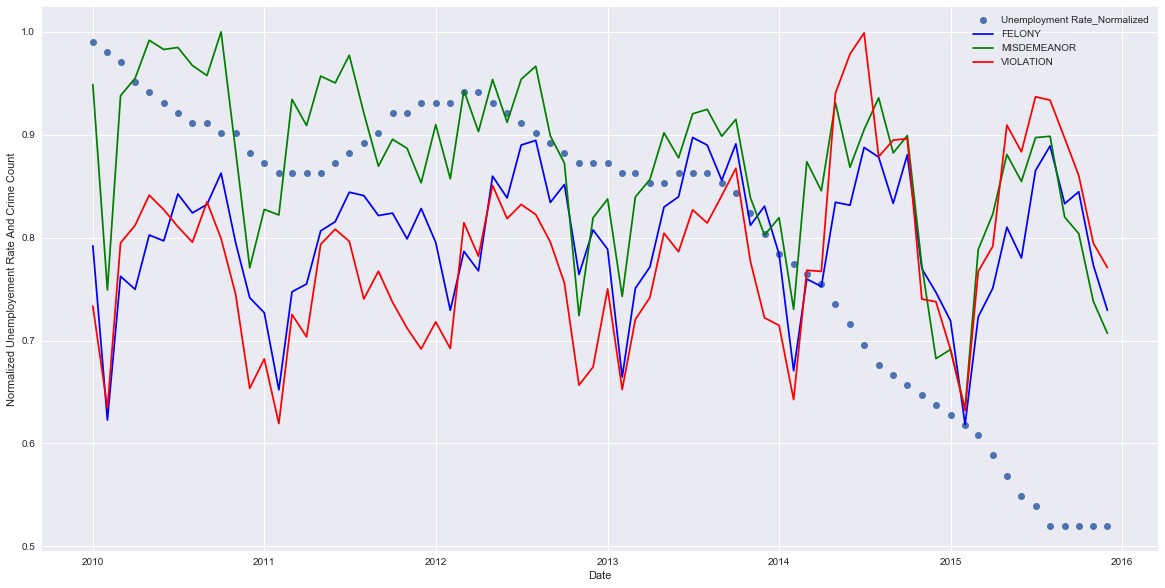

In [392]:
plt.figure(figsize=(20,10))
plt.plot_date(unemp_ac['DATE'], unemp_ac['Unemployment Rate_Normalized'])
plt.plot_date(df_ac['DATE'], df_ac['FELONY_NORMALIZED'], 'b-',label="FELONY")
plt.plot_date(df_ac['DATE'], df_ac['MISDEMEANOR_NORMALIZED'], 'g-',label="MISDEMEANOR")
plt.plot_date(df_ac['DATE'], df_ac['VIOLATION_NORMALIZED'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Normalized Unemployement Rate And Crime Count")
#plt.title("Count vs Date by Crime Type")
plt.show()

In [241]:
from scipy.stats import pearsonr
print('FELONY vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df_ac['FELONY'],unemp_ac['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df_ac['FELONY'],unemp_ac['Unemployment Rate'])[1]))
print('MISDEMEANOR vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df_ac['MISDEMEANOR'],unemp_ac['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df_ac['MISDEMEANOR'],unemp_ac['Unemployment Rate'])[1]))
print('VIOLATION vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df_ac['VIOLATION'],unemp_ac['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df_ac['VIOLATION'],unemp_ac['Unemployment Rate'])[1]))


FELONY vs Unemployment Rate
Pearson correlation coeffcient: 0.019687303397, P-value: 0.869617373349
MISDEMEANOR vs Unemployment Rate
Pearson correlation coeffcient: 0.484349999728, P-value: 1.62554973974e-05
VIOLATION vs Unemployment Rate
Pearson correlation coeffcient: -0.368524796171, P-value: 0.00144646493061


### Analysis
We can see that with a high confidence of 99%, misdemeanor crime is positively correlated with the unemployment rate. And violation has a negative correlation with the unemployment rate with 95% confidence. However, we cannot say there is a correlation between felony and unemployment rate.

In [257]:
df_year=df_ac.groupby('YEAR').sum()[['FELONY','MISDEMEANOR','VIOLATION']]
df_year['FELONY_NORMALIZED']=(df_year['FELONY'])/df_year['FELONY'].max()
df_year['MISDEMEANOR_NORMALIZED']=(df_year['MISDEMEANOR'])/df_year['MISDEMEANOR'].max()
df_year['VIOLATION_NORMALIZED']=(df_year['VIOLATION'])/df_year['VIOLATION'].max()
unemp_year=unemp_ac.groupby('YEAR').sum()[['Labor Force','Employed','Unemployment Rate']]
unemp_year['Unemployment Rate_Normalized']=(unemp_year['Unemployment Rate'])/unemp_year['Unemployment Rate'].max()
unemp_year['LF_Normalized']=(unemp_year['Labor Force'])/unemp_year['Labor Force'].max()
unemp_year['Employed_Normalized']=(unemp_year['Employed'])/unemp_year['Employed'].max()
#df_year['COUNT']=df.groupby('weekday').count()['DATE']
#df_year['FELONY_AVG']=weekday['FELONY']/weekday['COUNT']
#df_year['MISDEMEANOR_AVG']=weekday['MISDEMEANOR']/weekday['COUNT']
#df_year['VIOLATION_AVG']=weekday['VIOLATION']/weekday['COUNT']
#df_year['OTHER_AVG']=weekday['OTHER']/weekday['COUNT']

In [258]:
df_year

,FELONY,MISDEMEANOR,VIOLATION,FELONY_NORMALIZED,MISDEMEANOR_NORMALIZED,VIOLATION_NORMALIZED
YEAR,,,,,,
2010,147513,303605,58607,0.959559,1.000000,0.932090
2011,148082,294697,55419,0.963260,0.970659,0.881387
2012,153697,292259,58172,0.999785,0.962629,0.925171
2013,153730,282483,58745,1.000000,0.930429,0.934284
2014,150716,276770,62877,0.980394,0.911612,1.000000
2015,146137,260133,62306,0.950608,0.856814,0.990919


In [266]:
unemp_year.index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015], dtype='int64', name='YEAR')

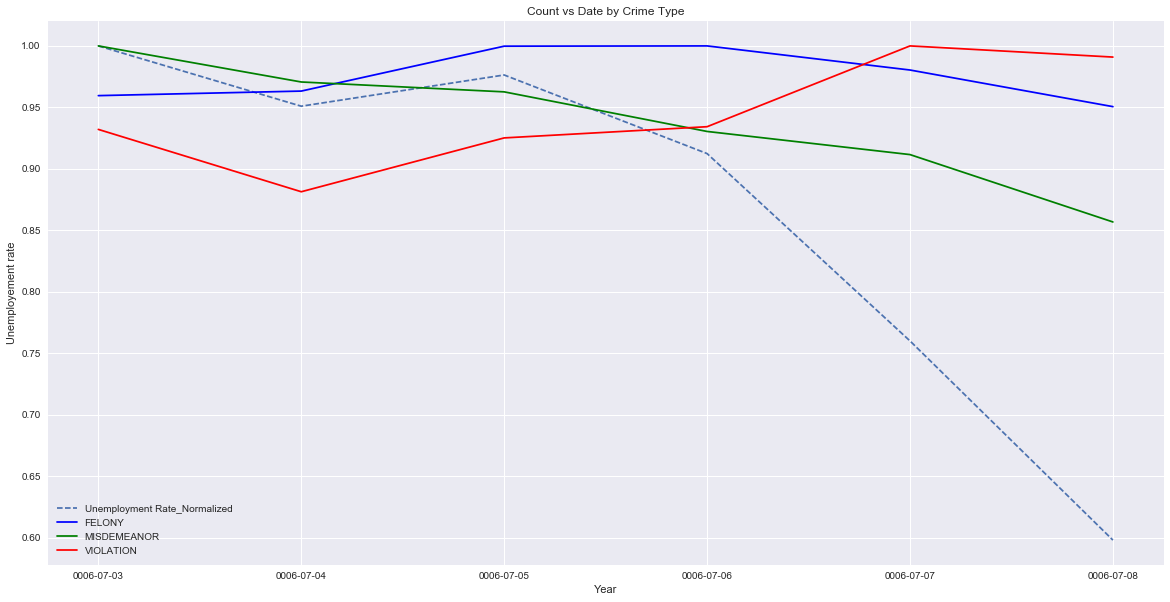

In [269]:
plt.figure(figsize=(20,10))
plt.plot_date(unemp_year.index, unemp_year['Unemployment Rate_Normalized'],'--')
plt.plot_date(df_year.index, df_year['FELONY_NORMALIZED'], 'b-',label="FELONY")
plt.plot_date(df_year.index, df_year['MISDEMEANOR_NORMALIZED'], 'g-',label="MISDEMEANOR")
plt.plot_date(df_year.index, df_year['VIOLATION_NORMALIZED'], 'r-',label="VIOLATION")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Unemployement rate")
plt.title("Count vs Date by Crime Type")
plt.show()

In [270]:
from scipy.stats import pearsonr
print('FELONY vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df_year['FELONY'],unemp_year['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df_year['FELONY'],unemp_year['Unemployment Rate'])[1]))
print('MISDEMEANOR vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df_year['MISDEMEANOR'],unemp_year['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df_year['MISDEMEANOR'],unemp_year['Unemployment Rate'])[1]))
print('VIOLATION vs Unemployment Rate')
print("Pearson correlation coeffcient: "+str(pearsonr(df_year['VIOLATION'],unemp_year['Unemployment Rate'])[0])+", P-value: "+str(pearsonr(df_year['VIOLATION'],unemp_year['Unemployment Rate'])[1]))


FELONY vs Unemployment Rate
Pearson correlation coeffcient: 0.41024246007, P-value: 0.419157982363
MISDEMEANOR vs Unemployment Rate
Pearson correlation coeffcient: 0.95725455292, P-value: 0.0027017082005
VIOLATION vs Unemployment Rate
Pearson correlation coeffcient: -0.804573465616, P-value: 0.0535554763031


### Analysis
To eliminate the impact of financial crisis on unemployment rate and hence on the correlation analysis, we focused our analysis on the after crisis time from 2010 to 2015. Also, we removed the seasonal effect on the crime rate by analyzing the annualized number. Based on the above peason relation analysis, with 95% confidence, misdemeanor is strongly positively correlated with unemployment rate.